## Data analysis 

### csv importing


In [67]:
meta_data_path =  "data/1/MetaData.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

meta_data = pd.read_csv(meta_data_path)
meta_data



,id,gender,age,county,ptb,remarks
0,1000,male,31,Shenxhen,0,normal
1,1001,male,64,Shenxhen,0,normal
2,1002,male,35,Shenxhen,0,normal
3,1003,male,32,Shenxhen,1,"STB,ATB,tuberculosis pleuritis"
4,1004,male,2,Shenxhen,1,secondary PTB in the bilateral upper field
...,...,...,...,...,...,...
699,1699,M,047,Montgomery,1,persistent rt pleural peel with some interval ...
700,1700,F,030,Montgomery,0,normal
701,1701,F,044,Montgomery,0,normal
702,1702,F,030,Montgomery,1,left pleural effusion; best seen on lateral vi...


### Gender

In [68]:

print(meta_data["gender"].value_counts())


gender
male           358
female         176
F               74
M               63
Male            12
Male,            6
Female,          5
femal            3
Female           3
male35yrs        2
female24yrs      1
O                1
Name: count, dtype: int64


In [69]:
# Define a mapping function to standardize gender values
def standardize_gender(value):
    if value.lower().startswith('m'):
        return 'Male'
    elif value.lower().startswith('f'):
        return 'Female'
    else:
        return 'Other'

# Apply the mapping
meta_data['standardized_gender'] = meta_data['gender'].apply(standardize_gender)

# Create a binary column: 1 for Male, 0 for Female, NaN for Other
meta_data['binary_gender'] = meta_data['standardized_gender'].map({'Male': 1, 'Female': 0})

# delete Other
meta_data = meta_data[meta_data['standardized_gender'] != 'Other']

meta_data

,id,gender,age,county,ptb,remarks,standardized_gender,binary_gender
0,1000,male,31,Shenxhen,0,normal,Male,1.0
1,1001,male,64,Shenxhen,0,normal,Male,1.0
2,1002,male,35,Shenxhen,0,normal,Male,1.0
3,1003,male,32,Shenxhen,1,"STB,ATB,tuberculosis pleuritis",Male,1.0
4,1004,male,2,Shenxhen,1,secondary PTB in the bilateral upper field,Male,1.0
...,...,...,...,...,...,...,...,...
699,1699,M,047,Montgomery,1,persistent rt pleural peel with some interval ...,Male,1.0
700,1700,F,030,Montgomery,0,normal,Female,0.0
701,1701,F,044,Montgomery,0,normal,Female,0.0
702,1702,F,030,Montgomery,1,left pleural effusion; best seen on lateral vi...,Female,0.0


### age

In [70]:

print(meta_data["age"].value_counts())

age
28     32
25     27
39     22
30     21
38     20
       ..
10      1
051     1
71      1
85      1
073     1
Name: count, Length: 137, dtype: int64


In [71]:
def standardize_age(value):
    try:
        return int(value)
    except:
        if "monthes" in value:
            #  drop the "monthes" and conver to years
            value = value.replace("monthes", "")
            return int(value) / 12
        elif "female" in value:
            value = value.replace("female", "") 
            return int(value)
        elif "male" in value:
            value = value.replace("male", "")
            return int(value)
        else:
            return np.nan
    
# Apply the mapping
meta_data['standardized_age'] = meta_data['age'].apply(standardize_age)

meta_data = meta_data.dropna(subset=['standardized_age'])

meta_data

/var/folders/9k/39n4j3pj4gq52rl805wbkclm0000gq/T/ipykernel_79346/3083678894.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['standardized_age'] = meta_data['age'].apply(standardize_age)


,id,gender,age,county,ptb,remarks,standardized_gender,binary_gender,standardized_age
0,1000,male,31,Shenxhen,0,normal,Male,1.0,31.0
1,1001,male,64,Shenxhen,0,normal,Male,1.0,64.0
2,1002,male,35,Shenxhen,0,normal,Male,1.0,35.0
3,1003,male,32,Shenxhen,1,"STB,ATB,tuberculosis pleuritis",Male,1.0,32.0
4,1004,male,2,Shenxhen,1,secondary PTB in the bilateral upper field,Male,1.0,2.0
...,...,...,...,...,...,...,...,...,...
699,1699,M,047,Montgomery,1,persistent rt pleural peel with some interval ...,Male,1.0,47.0
700,1700,F,030,Montgomery,0,normal,Female,0.0,30.0
701,1701,F,044,Montgomery,0,normal,Female,0.0,44.0
702,1702,F,030,Montgomery,1,left pleural effusion; best seen on lateral vi...,Female,0.0,30.0


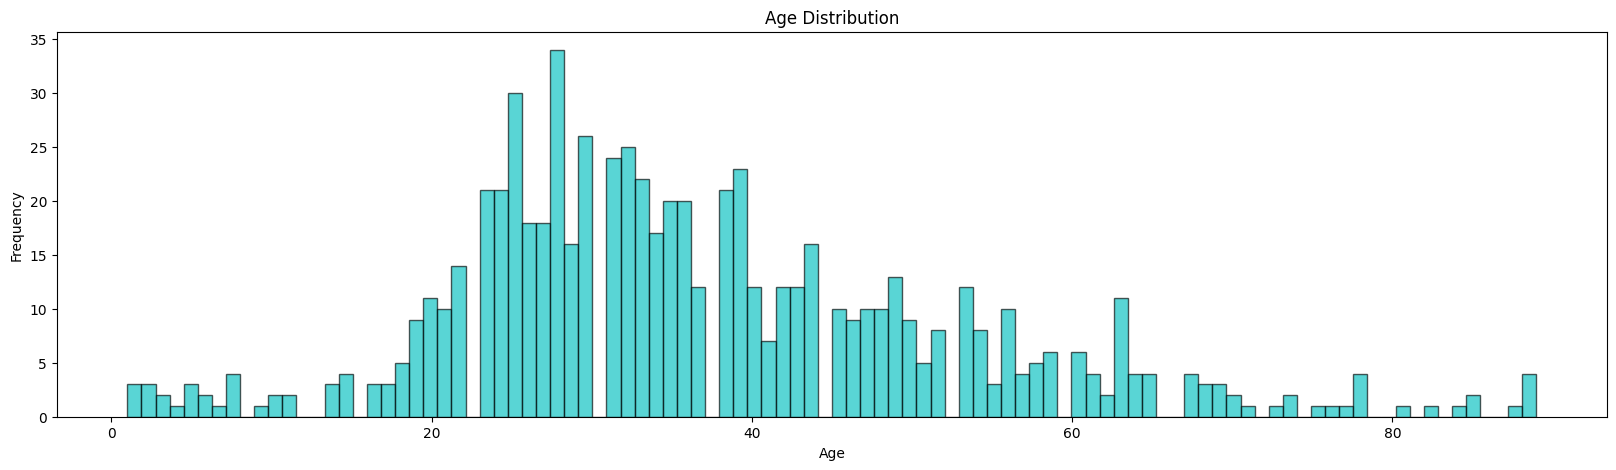

In [72]:
# create histograms of age
plt.figure(figsize=(20, 5))
plt.hist(meta_data['standardized_age'], bins=100, color='c', edgecolor='k', alpha=0.65)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


we can see that the rows with gender information within the age column already known:

In [73]:
# if "male in "meta_data['age']
male_age_data = meta_data[meta_data['age'].str.contains("male")]    
male_age_data

,id,gender,age,county,ptb,remarks,standardized_gender,binary_gender,standardized_age
367,1367,male35yrs,male35,Shenxhen,1,Bilateral secondary PTB,Male,1.0,35.0
393,1393,male35yrs,male35,Shenxhen,1,PTB in the left upper field,Male,1.0,35.0
420,1420,female24yrs,female24,Shenxhen,0,normal,Female,0.0,24.0


I will also add an age group column

In [74]:
meta_data["standardized_age_group"] = pd.cut(meta_data['standardized_age'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99], labels=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
meta_data

/var/folders/9k/39n4j3pj4gq52rl805wbkclm0000gq/T/ipykernel_79346/3191559697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data["standardized_age_group"] = pd.cut(meta_data['standardized_age'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99], labels=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90])


,id,gender,age,county,ptb,remarks,standardized_gender,binary_gender,standardized_age,standardized_age_group
0,1000,male,31,Shenxhen,0,normal,Male,1.0,31.0,30
1,1001,male,64,Shenxhen,0,normal,Male,1.0,64.0,60
2,1002,male,35,Shenxhen,0,normal,Male,1.0,35.0,30
3,1003,male,32,Shenxhen,1,"STB,ATB,tuberculosis pleuritis",Male,1.0,32.0,30
4,1004,male,2,Shenxhen,1,secondary PTB in the bilateral upper field,Male,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...
699,1699,M,047,Montgomery,1,persistent rt pleural peel with some interval ...,Male,1.0,47.0,40
700,1700,F,030,Montgomery,0,normal,Female,0.0,30.0,30
701,1701,F,044,Montgomery,0,normal,Female,0.0,44.0,40
702,1702,F,030,Montgomery,1,left pleural effusion; best seen on lateral vi...,Female,0.0,30.0,30


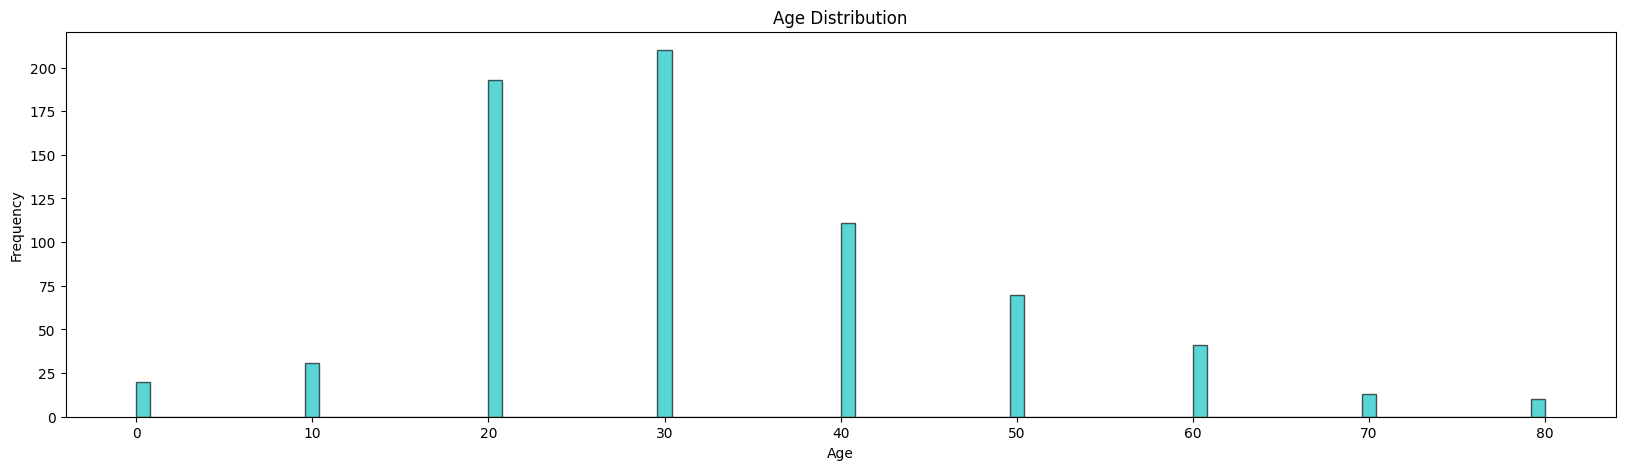

In [75]:
# create histograms of age
plt.figure(figsize=(20, 5))
plt.hist(meta_data['standardized_age_group'], bins=100, color='c', edgecolor='k', alpha=0.65)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### county

In [76]:
print(meta_data["county"].value_counts())

county
Shenxhen      562
Montgomery    137
Name: count, dtype: int64


In [77]:
def standardize_county(value):
    if value == "Shenxhen":
        return 0
    elif value == "Montgomery":
        return 1
    else:
        return np.nan
    
# Apply the mapping
meta_data['binary_county'] = meta_data['county'].apply(standardize_county)

/var/folders/9k/39n4j3pj4gq52rl805wbkclm0000gq/T/ipykernel_79346/1548364020.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['binary_county'] = meta_data['county'].apply(standardize_county)


### ptb

In [99]:
print(meta_data["ptb"].value_counts())

ptb
0    354
1    345
Name: count, dtype: int64


In [78]:
meta_data

,id,gender,age,county,ptb,remarks,standardized_gender,binary_gender,standardized_age,standardized_age_group,binary_county
0,1000,male,31,Shenxhen,0,normal,Male,1.0,31.0,30,0
1,1001,male,64,Shenxhen,0,normal,Male,1.0,64.0,60,0
2,1002,male,35,Shenxhen,0,normal,Male,1.0,35.0,30,0
3,1003,male,32,Shenxhen,1,"STB,ATB,tuberculosis pleuritis",Male,1.0,32.0,30,0
4,1004,male,2,Shenxhen,1,secondary PTB in the bilateral upper field,Male,1.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
699,1699,M,047,Montgomery,1,persistent rt pleural peel with some interval ...,Male,1.0,47.0,40,1
700,1700,F,030,Montgomery,0,normal,Female,0.0,30.0,30,1
701,1701,F,044,Montgomery,0,normal,Female,0.0,44.0,40,1
702,1702,F,030,Montgomery,1,left pleural effusion; best seen on lateral vi...,Female,0.0,30.0,30,1


## create a processed data set

In [79]:
df = meta_data[["id", "binary_gender", "standardized_age", "standardized_age_group", "binary_county", "ptb"]]
df.to_csv("data/MetaData_cleaned.csv", index=False)
meta_data.to_csv("data/1/MetaData_cleaned_all.csv", index=False)


### data statistics of the processed df

In [80]:
df

,id,binary_gender,standardized_age,standardized_age_group,binary_county,ptb
0,1000,1.0,31.0,30,0,0
1,1001,1.0,64.0,60,0,0
2,1002,1.0,35.0,30,0,0
3,1003,1.0,32.0,30,0,1
4,1004,1.0,2.0,0,0,1
...,...,...,...,...,...,...
699,1699,1.0,47.0,40,1,1
700,1700,0.0,30.0,30,1,0
701,1701,0.0,44.0,40,1,0
702,1702,0.0,30.0,30,1,1


Text(0.5, 1.0, 'PTB Distribution')

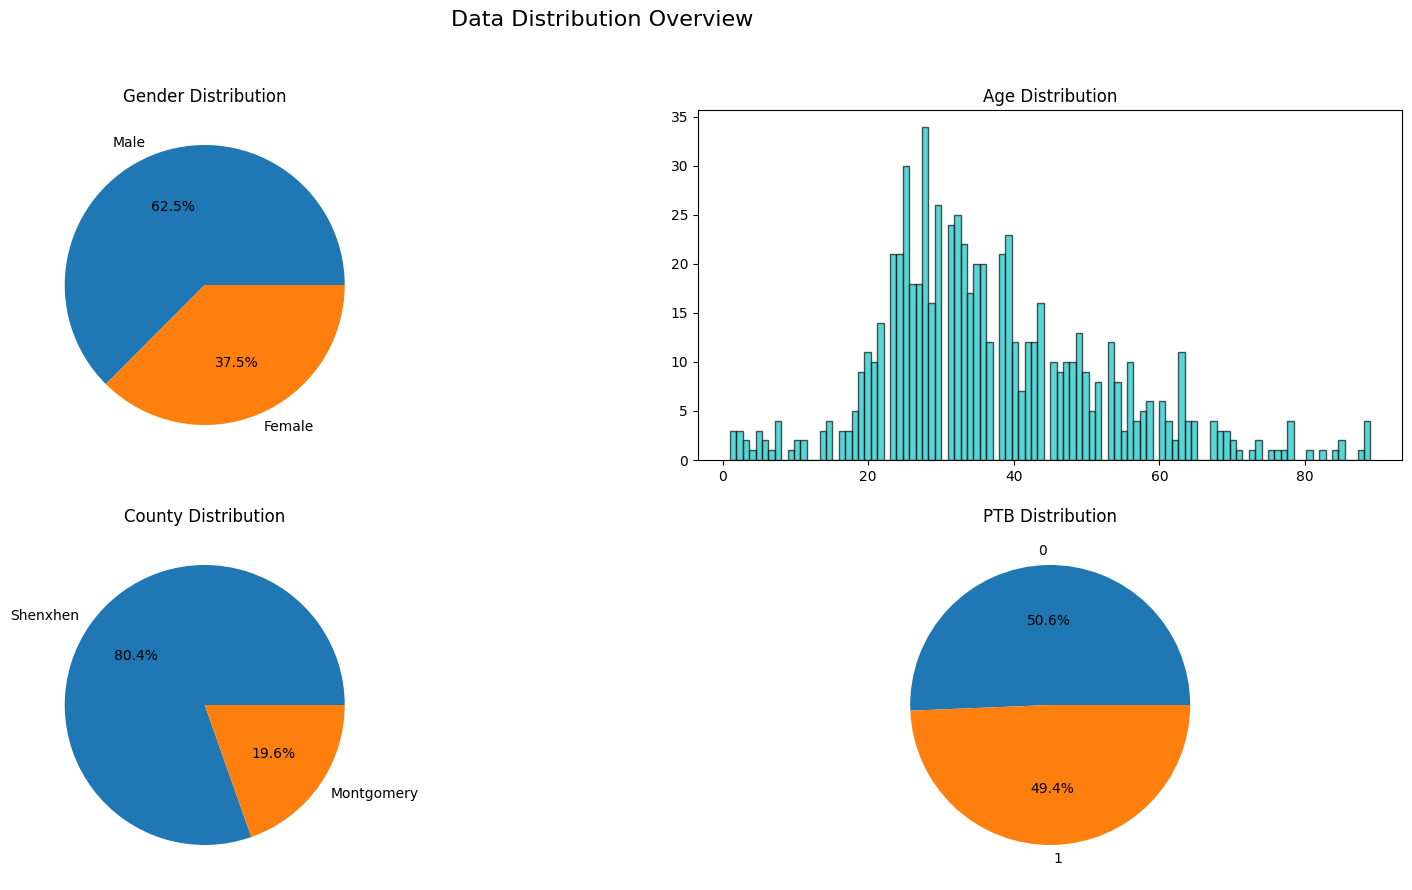

In [102]:
# create a plot with 4 subplots

fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Data Distribution Overview', fontsize=16)

# plot 1 pie chart of binary gender 1 is male 0 is female
axs[0, 0].pie(df['binary_gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')
axs[0, 0].set_title('Gender Distribution')

axs[0, 1].hist(df['standardized_age'], bins=100, color='c', edgecolor='k', alpha=0.65)
axs[0, 1].set_title('Age Distribution')

axs[1, 0].pie(df['binary_county'].value_counts(), labels=['Shenxhen', 'Montgomery'], autopct='%1.1f%%')
axs[1, 0].set_title('County Distribution')

axs[1, 1].pie(df['ptb'].value_counts(), labels=[0,1], autopct='%1.1f%%')
axs[1, 1].set_title('PTB Distribution')
